In [1]:
import pandas as pd

In [111]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [109]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
from xgboost import XGBClassifier

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

In [8]:
df = pd.read_csv("credit_card_fraud_dataset.csv")

In [9]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [10]:
df.columns

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [12]:
df.shape

(100000, 7)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionID,100000.0,50000.500000,28867.657797,1.00,25000.750,50000.5,75000.2500,100000.00
Amount,100000.0,2497.092666,1442.415999,1.05,1247.955,2496.5,3743.5925,4999.77
MerchantID,100000.0,501.676070,288.715868,1.00,252.000,503.0,753.0000,1000.00
IsFraud,100000.0,0.010000,0.099499,0.00,0.000,0.0,0.0000,1.00


In [14]:
df.IsFraud.value_counts()

IsFraud
0    99000
1     1000
Name: count, dtype: int64

<Axes: title={'center': 'Fraud Distribution'}, ylabel='count'>

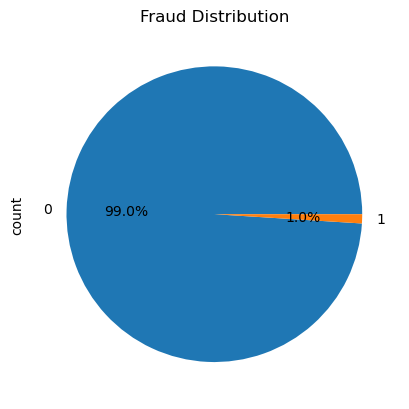

In [15]:
df['IsFraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Fraud Distribution")

In [16]:
df.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [17]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [18]:
df['Hour'] = df['TransactionDate'].dt.hour

In [19]:
df['Day'] = df['TransactionDate'].dt.day

In [20]:
df['Month'] = df['TransactionDate'].dt.month

In [21]:
df['Weekday'] = df['TransactionDate'].dt.weekday

In [22]:
df = df.drop(['TransactionID', 'TransactionDate'], axis=1)

In [23]:
encoder = LabelEncoder()

In [24]:
df['MerchantID'] = encoder.fit_transform(df['MerchantID'])

In [25]:
df['TransactionType'] = encoder.fit_transform(df['TransactionType'])

In [26]:
df['Location'] = encoder.fit_transform(df['Location'])

In [27]:
scale = Standardscale()

In [28]:
df['Amount'] = scale.fit_transform(df['Amount'].values.reshape(-1, 1))

In [29]:
x = df.drop('IsFraud', axis=1)
y = df['IsFraud']

In [30]:
x_trian, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
smote = SMOTE(random_state=42)

In [32]:
x_train_smote, y_train_smote = smote.fit_resample(x_trian, y_train)

In [33]:
x_train_smote.nunique()

Amount             152396
MerchantID           1000
TransactionType         2
Location               10
Hour                   24
Day                    31
Month                  12
Weekday                 7
dtype: int64

In [34]:
y_train_smote.value_counts()

IsFraud
0    79213
1    79213
Name: count, dtype: int64

In [35]:
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)

In [36]:
xgb.fit(x_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
y_pred = xgb.predict(x_test)

In [38]:
print("------Confusion matrix------")
confusion_matrix(y_test, y_pred)

------Confusion matrix------


array([[14245,  5542],
       [  153,    60]], dtype=int64)

In [39]:
print("------Classification Report------\n", classification_report(y_test, y_pred))

------Classification Report------
               precision    recall  f1-score   support

           0       0.99      0.72      0.83     19787
           1       0.01      0.28      0.02       213

    accuracy                           0.72     20000
   macro avg       0.50      0.50      0.43     20000
weighted avg       0.98      0.72      0.82     20000



In [40]:
acc = accuracy_score(y_test, y_pred)

In [41]:
print(f"Accuracy = {acc*100:0.2F}%")

Accuracy = 71.53%


In [42]:
y_pred_prob = xgb.predict_proba(x_test)[:, 1]

In [43]:
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC-Curve Score = {auc*100:0.2f}%")

AUC-ROC-Curve Score = 50.08%


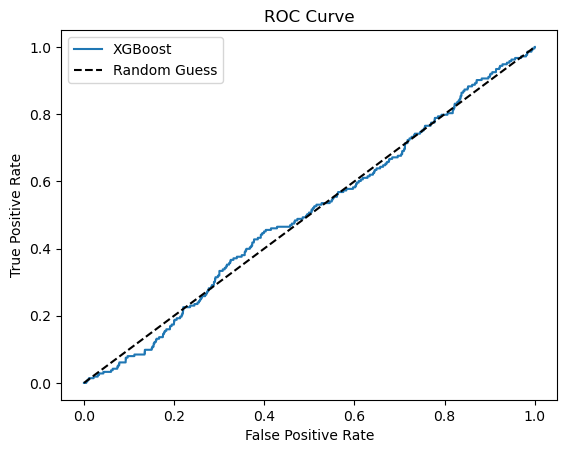

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [127]:
def predict_fraud():
    print("Enter transaction details below:")
    amount = float(input("Transaction Amount: "))
    merchant_id = input("Merchant ID (string): ")
    transaction_type = input("Transaction Type (e.g., 'Online', 'In-Person'): ")
    location = input("Transaction Location (e.g., 'City1', 'City2'): ")
    hour = int(input("Transaction Hour (0-23): "))
    day = int(input("Transaction Day (1-31): "))
    month = int(input("Transaction Month (1-12): "))
    weekday = int(input("Transaction Weekday (0=Monday, 6=Sunday): "))

    if merchant_id in encoder.classes_:
        merchant_id_encoded = encoder.transform([merchant_id])[0]
    else:
        merchant_id_encoded = -1  # Assigning placeholder value for unseen labels

    # Handle unseen TransactionType
    if transaction_type in encoder.classes_:
        transaction_type_encoded = encoder.transform([transaction_type])[0]
    else:
        transaction_type_encoded = -1

    if location in encoder.classes_:
        location_encoded = encoder.transform([location])[0]
    else:
        location_encoded = -1

    amount_scaled = scale.transform([[amount]])[0][0]

    input_data = np.array([
        amount_scaled,
        merchant_id_encoded,
        transaction_type_encoded,
        location_encoded,
        hour,
        day,
        month,
        weekday
    ]).reshape(1, -1)

    prediction = xgb.predict(input_data)[0]
    prediction_prob = xgb.predict_proba(input_data)[0][1]

    if prediction == 1:
        print(f"⚠️ The transaction is predicted to be FRAUDULENT with a probability of {prediction_prob:.2f}")
    else:
        print(f"✅ The transaction is predicted to be SAFE with a probability of {1 - prediction_prob:.2f}")

In [125]:
predict_fraud()

Enter transaction details below:


Transaction Amount:  1500
Merchant ID (string):  xyz
Transaction Type (e.g., 'Online', 'In-Person'):  Online
Transaction Location (e.g., 'City1', 'City2'):  a1
Transaction Hour (0-23):  1
Transaction Day (1-31):  1
Transaction Month (1-12):  1
Transaction Weekday (0=Monday, 6=Sunday):  0


✅ The transaction is predicted to be SAFE with a probability of 0.93
